### Data Dictionary

The planet's surface temperature is increasing as greenhouse gas emissions increase, and this global warming and carbon cycle disruption is wreaking havoc on natural systems. Living systems that depend on current temperature, weather, currents and carbon balance are jeopardized, and human society will be forced to contend with widespread economic, social, political and environmental damage as the temperature continues to rise. In these exercises, we examine the relationship between global temperature changes, greenhouse gases and human carbon emissions using time series of actual atmospheric and ice core measurements from the National Oceanic and Atmospheric Administration (NOAA) and Carbon Dioxide Information Analysis Center (CDIAC).

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

#from pycaret.classification import *
#from pycaret.clustering import *
from pycaret.regression import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
#TEMP_CARBON QUESTIONS
#Question 1 - Which returns the latest year for carbon emission reports

In [3]:
df = pd.read_csv("temp_carbon.csv")

In [4]:
df

,year,temp_anomaly,land_anomaly,ocean_anomaly,carbon_emissions
0,1880,-0.11,-0.48,-0.01,236.0
1,1881,-0.08,-0.40,0.01,243.0
2,1882,-0.10,-0.48,0.00,256.0
3,1883,-0.18,-0.66,-0.04,272.0
4,1884,-0.26,-0.69,-0.14,275.0
...,...,...,...,...,...
263,1875,NaN,NaN,NaN,188.0
264,1876,NaN,NaN,NaN,191.0
265,1877,NaN,NaN,NaN,194.0
266,1878,NaN,NaN,NaN,196.0


In [5]:
df['year'].max()

2018

In [6]:
#Question 2 - find the differences between oldest and newest carbon emissions
df['year'].min()

1751

In [7]:
oldest = df[df['year']==1751]
oldest

,year,temp_anomaly,land_anomaly,ocean_anomaly,carbon_emissions
139,1751,NaN,NaN,NaN,3.0


In [8]:
newest = df[df['year']==2018]
newest

,year,temp_anomaly,land_anomaly,ocean_anomaly,carbon_emissions
138,2018,0.82,1.18,0.68,NaN


In [9]:
diff = 3.0 - 0
diff

3.0

In [10]:
#Question 3 - differences in temperature min to max
df['temp_anomaly'].min()

-0.45

In [11]:
df['temp_anomaly'].max()

0.98

In [12]:
diff2 = -0.45 - 0.98
abs(diff2)

1.43

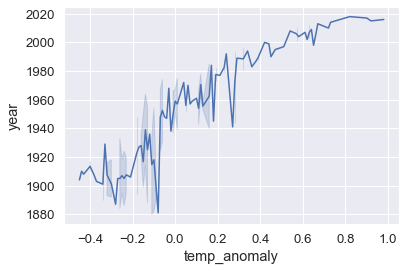

In [13]:
#Question 4 - time line plot of temperatures with blue mean line
sns.lineplot(x=df['temp_anomaly'],y=df['year'],data=df);

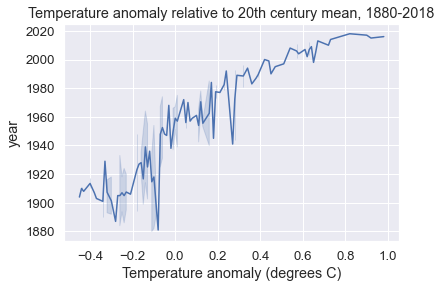

In [14]:
#Question 5 - add title and data references
plt.title("Temperature anomaly relative to 20th century mean, 1880-2018")

sns.lineplot(x=df['temp_anomaly'],y=df['year'],data=df);

plt.xlabel("Temperature anomaly (degrees C)");

In [15]:
#Question 6 - data analysis questions
        #earlier year with temp above 20th century mean - 1940
        #last year below the 20th century mean - 1978
        #what year did the temperature anomly exceed 0.5 degrees - 1997

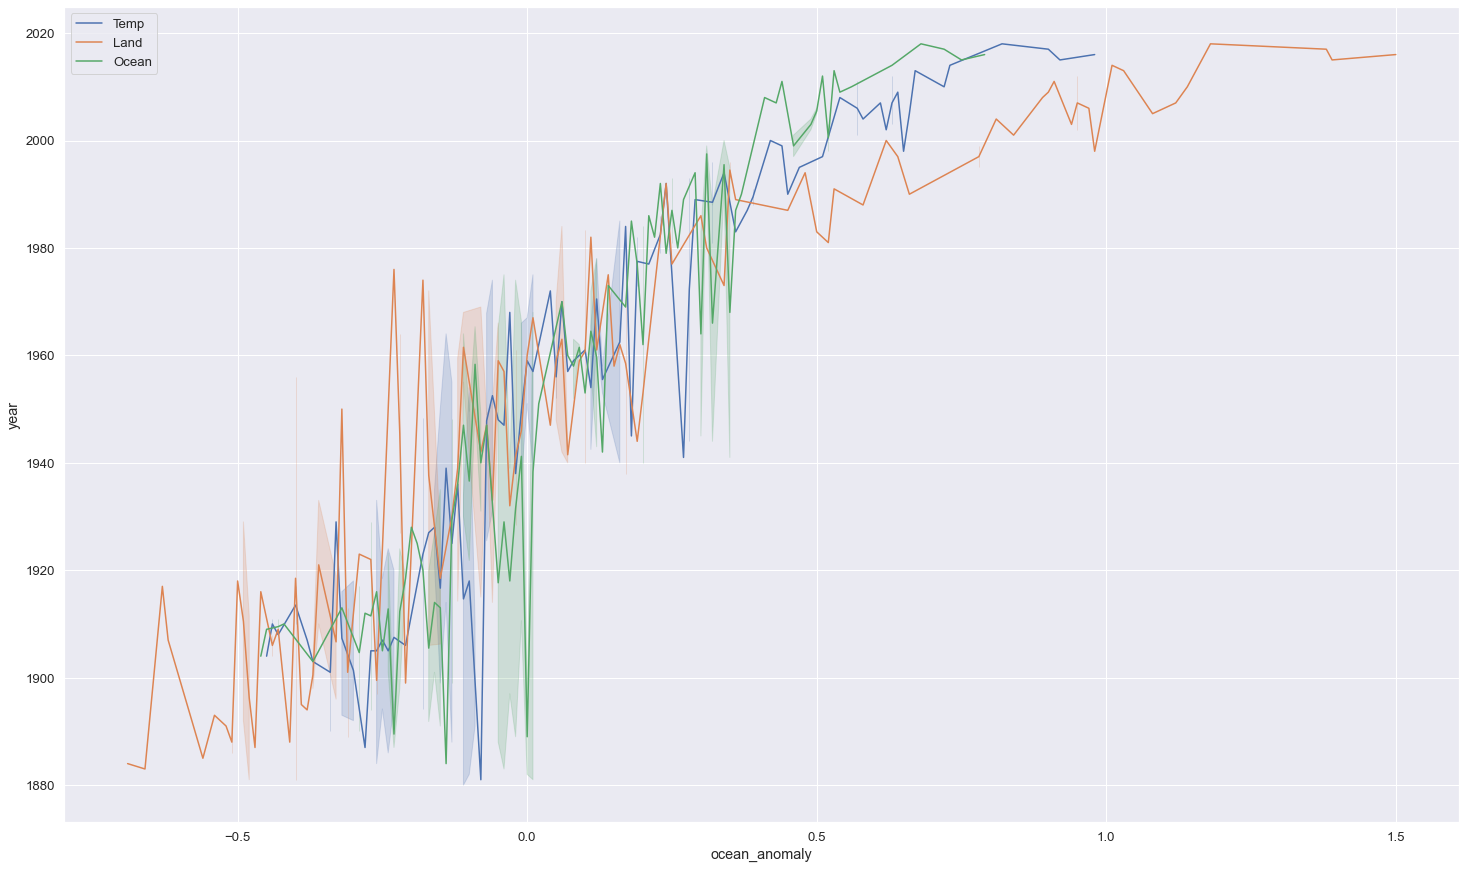

In [16]:
#Question 7 - Add ocean and land lines
#Question 10 - line plot of emmisions over time
plt.figure(figsize=(25,15))

sns.lineplot(x=df['temp_anomaly'],y=df['year'],data=df,label='Temp')
sns.lineplot(x=df['land_anomaly'],y=df['year'],data=df,label='Land')
sns.lineplot(x=df['ocean_anomaly'],y=df['year'],data=df,label='Ocean')

plt.show()

In [17]:
#GREENHOUSE_GASES QUESTIONS
    #Question 8 - line plot of concentrations with facet grid

In [18]:
df2 = pd.read_csv("greenhouse_gases.csv")

In [19]:
df2

,year,gas,concentration
0,20,CO2,277.7
1,40,CO2,277.8
2,60,CO2,277.3
3,80,CO2,277.3
4,100,CO2,277.5
...,...,...,...
295,1920,N2O,285.2
296,1940,N2O,287.7
297,1960,N2O,292.3
298,1980,N2O,302.6


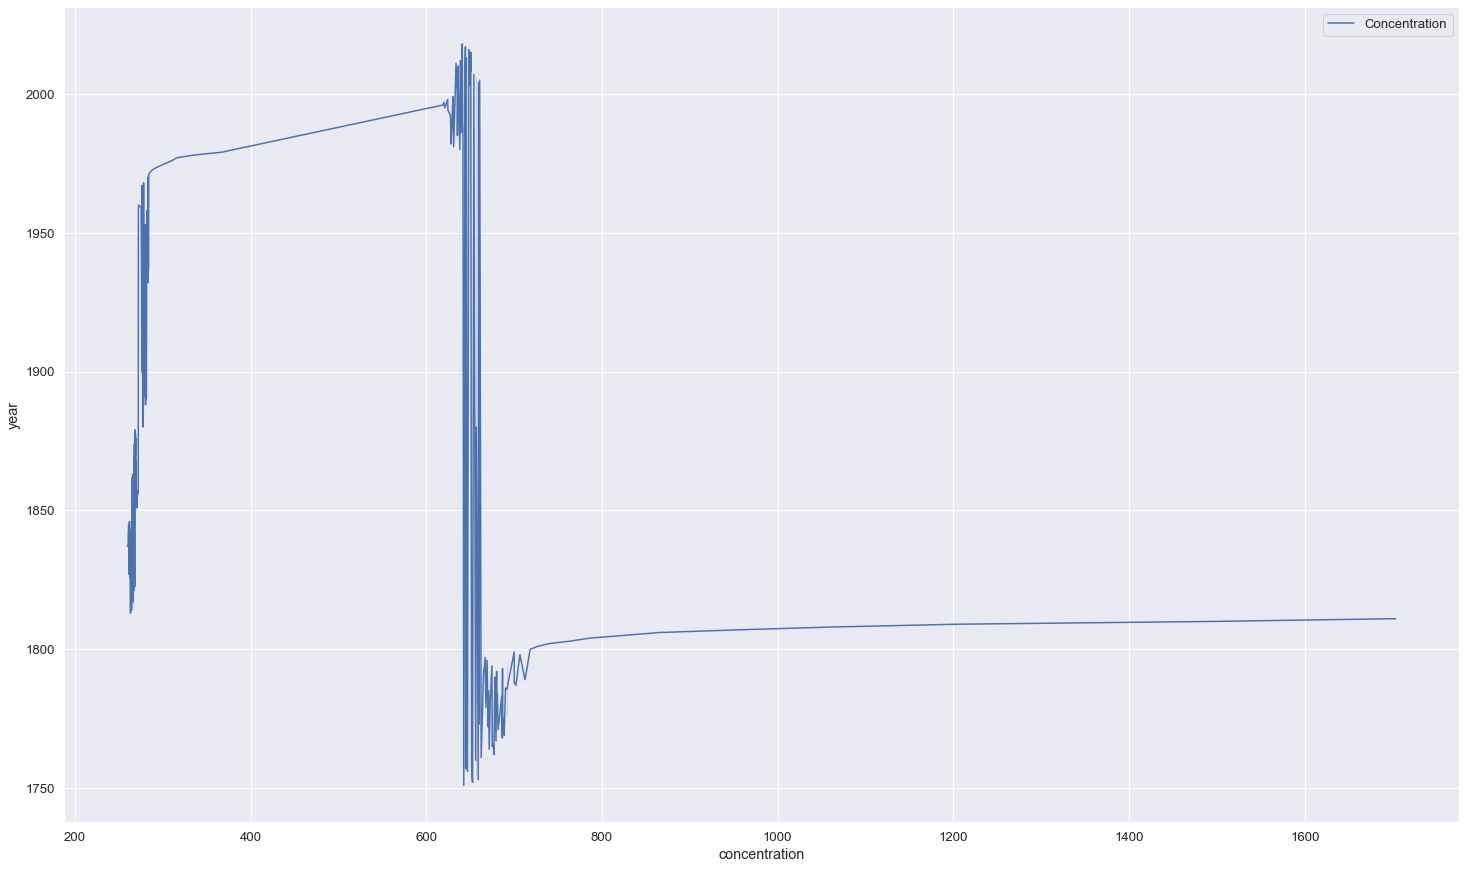

In [20]:
plt.figure(figsize=(25,15))

sns.lineplot(x=df2['concentration'],y=df['year'],data=df,label='Concentration');

In [21]:
#HISTORIC_CO2 QUESTIONS
    #Question 11 - line plot of sources of carbon
df3 = pd.read_csv("historic_co2.csv")

In [22]:
df3

,year,co2,source
0,1959,315.97,Mauna Loa
1,1960,316.91,Mauna Loa
2,1961,317.64,Mauna Loa
3,1962,318.45,Mauna Loa
4,1963,318.99,Mauna Loa
...,...,...,...
689,-791903,218.39,Ice Cores
690,-794903,198.79,Ice Cores
691,-799286,198.68,Ice Cores
692,-801975,202.92,Ice Cores


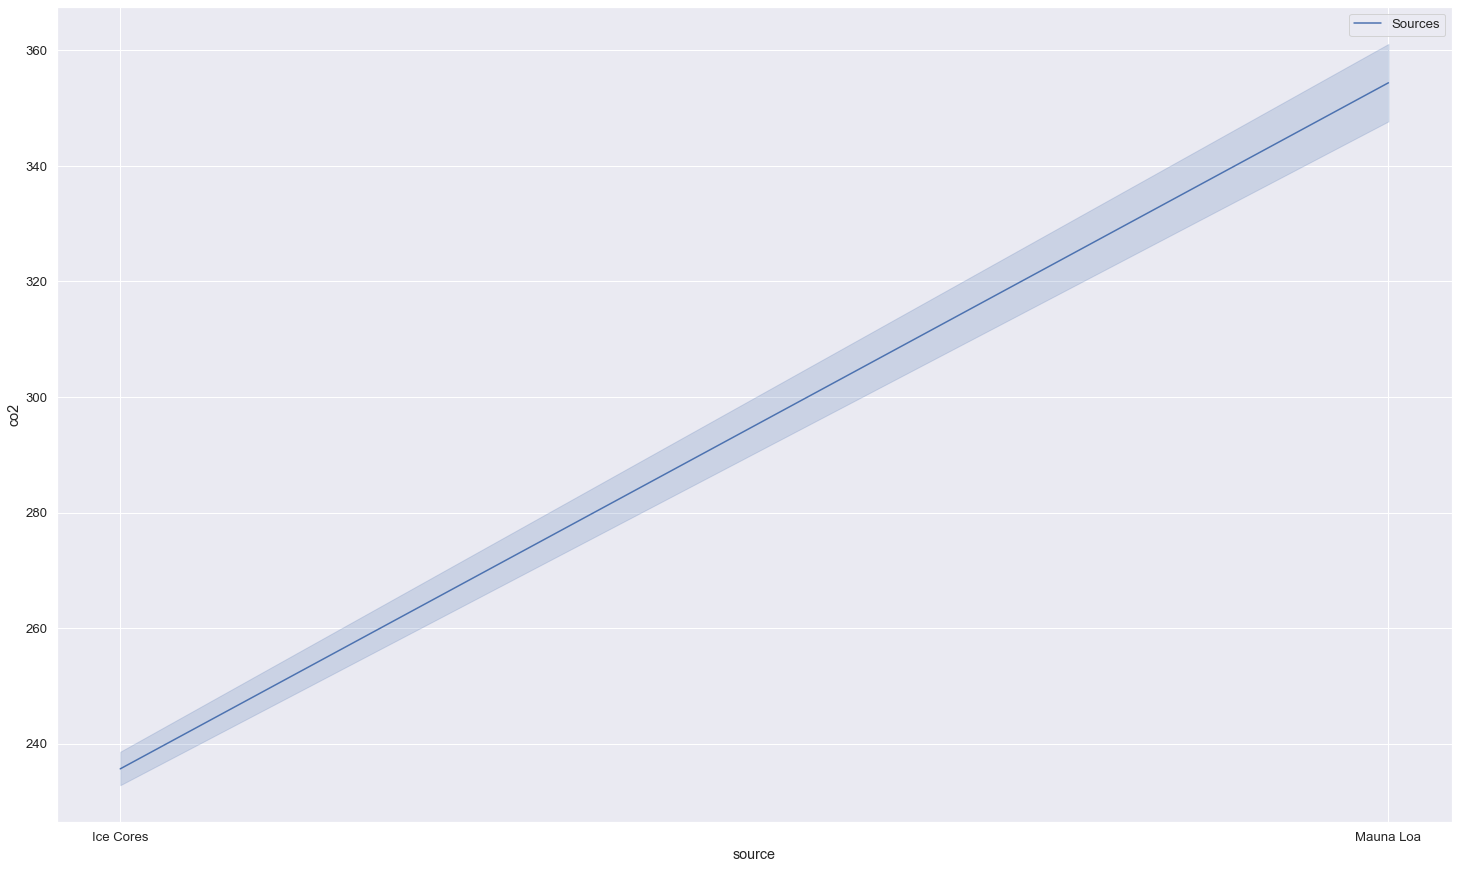

In [23]:
plt.figure(figsize=(25,15))

sns.lineplot(x=df3['source'],y=df3['co2'],data=df,label='Sources');

In [24]:
 #Question 12 - changing axis limits